In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
data=pd.read_csv('USvideos.csv')

In [3]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
data.shape

(40949, 16)

In [5]:
data.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

#### I’m going to put an empty string in place of each null value in the Description column

In [7]:
data['description'].fillna('',inplace=True)

In [8]:
data.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

In [9]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


#### Results
- The average number of views of a trending video is 2,360,784. The median value of the number of views is 681,861, which means that half of the trending videos have less than this number and the other half have views greater than this number.
- The average number of likes for a trending video is 74,266, while the average number of likes is 3,711.
- The average number of comments is 8,446 while the median is 1,856.

#### Now we want to see how many trending video titles have at least one uppercase word. To do this, we’ll add a new variable to the dataset whose value is True if the video title contains at least one uppercase word, and False otherwise:

In [11]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


data["contains_capitalized"] = data["title"].apply(contains_capitalized_word)

In [21]:
data['contains_capitalized'].value_counts()

False    22949
True     18000
Name: contains_capitalized, dtype: int64

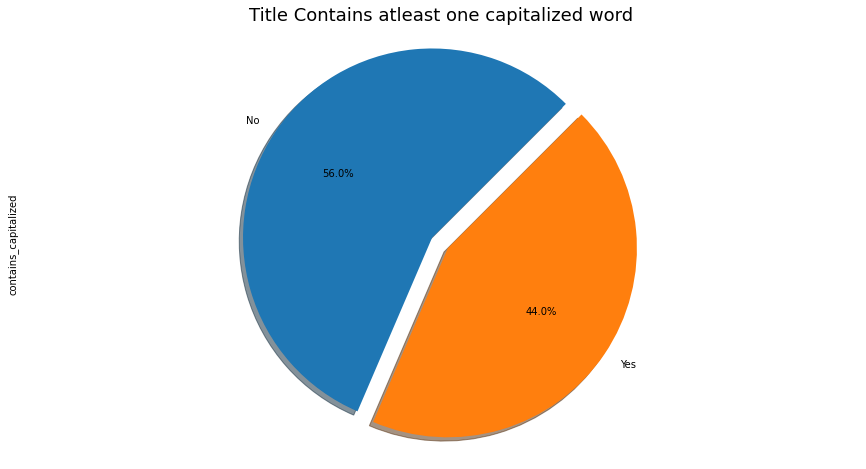

In [34]:
data['contains_capitalized'].value_counts().plot(kind='pie',labels=['No','Yes'],shadow=True,figsize=(15, 8),
                                                autopct='%1.1f%%',
                                                explode=(0.1, 0),
                                                startangle=45)
plt.title('Title Contains atleast one capitalized word',fontsize=18)
plt.axis('equal')
plt.show()

#### We can see that 44% of trending video titles contain at least one word in all caps. We will use our added variable later to analyze the correlation between the variables.

#### Let’s add another column to our dataset to analyze the length of titles of videos

In [35]:
data['title_length'] = data['title'].apply(lambda x:len(x))

Text(0.5, 1.0, 'Length of Title of Videos')

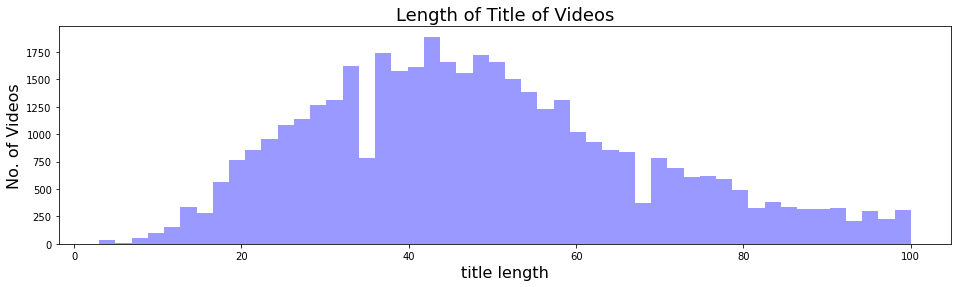

In [45]:
fig,ax=plt.subplots(figsize=(16,4))
fig=sns.distplot(data["title_length"], kde=False,color='blue')
fig.set_xlabel('title length',fontsize=16)
fig.set_ylabel('No. of Videos',fontsize=16)
fig.set_title('Length of Title of Videos',fontsize=18)

#### We can see that the videos title length distribution looks like a normal distribution, where most videos have a title length of around 30-60 characters

#### Now, let’s draw a scatter plot to analyze the relationship between the title length and the number of views:

Text(0.5, 1.0, 'Relationship between title length and views')

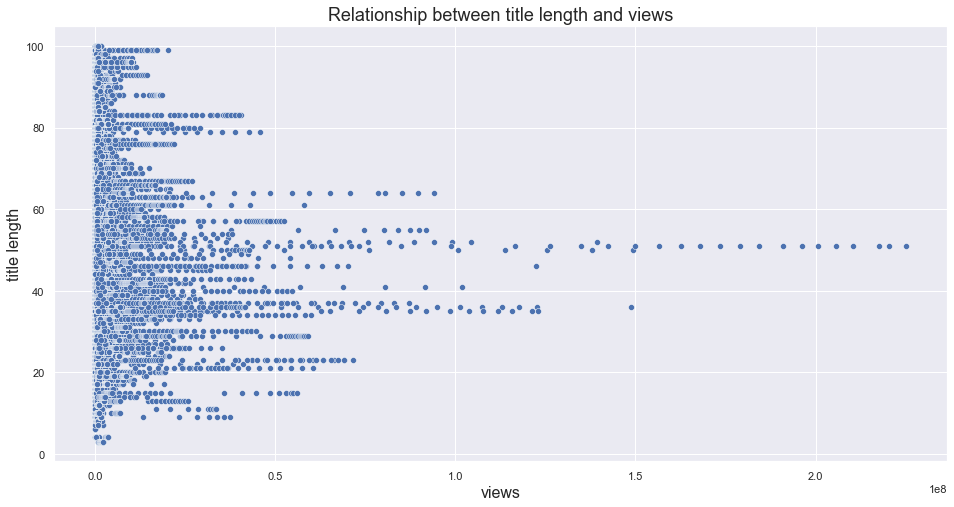

In [56]:
fig, ax = plt.subplots(figsize=(16,8))
fig=sns.scatterplot(x=data['views'], y=data['title_length'], palette="deep")
fig.set_xlabel('views',fontsize=16)
fig.set_ylabel('title length',fontsize=16)
fig.set_title('Relationship between title length and views',fontsize=18)

#### Looking at the scatter plot, we can tell that there is no relationship between the length of the title and the number of views. However, we do notice an interesting thing that the Videos having 100,000,000 and more views have a title length of between 33 and 55 characters or so.

## Correlation

<AxesSubplot:>

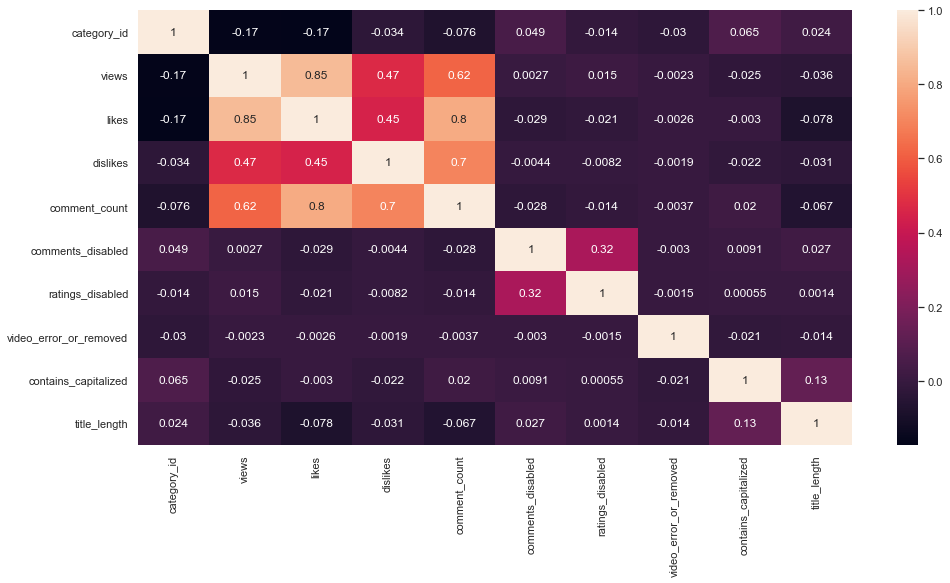

In [60]:
corr=data.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True)

#### The correlation map and correlation table above indicate that views and likes are strongly positively correlated.